In [1]:
#loading dataset
import numpy as np
import pandas as pd
#visualisation
import matplotlib
import matplotlib.pyplot as plt
#EDA
from collections import Counter
import seaborn as sns
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
#ensembling
from mlxtend.classifier import StackingCVClassifier
#ingore the warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/content/heart.2.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# print last 5 rows of the data
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [4]:
# number of rows and columns in the data
data.shape

(303, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# checking for missing values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

 understand our columns better:

In [7]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(data.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [8]:
# transform data to numeric to enable further analysis
data = data.apply(pd.to_numeric)
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Checking correlation between columns

In [9]:
print(data.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

In [10]:
# statistical measures about the data
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Exploratory Data Analysis (EDA)

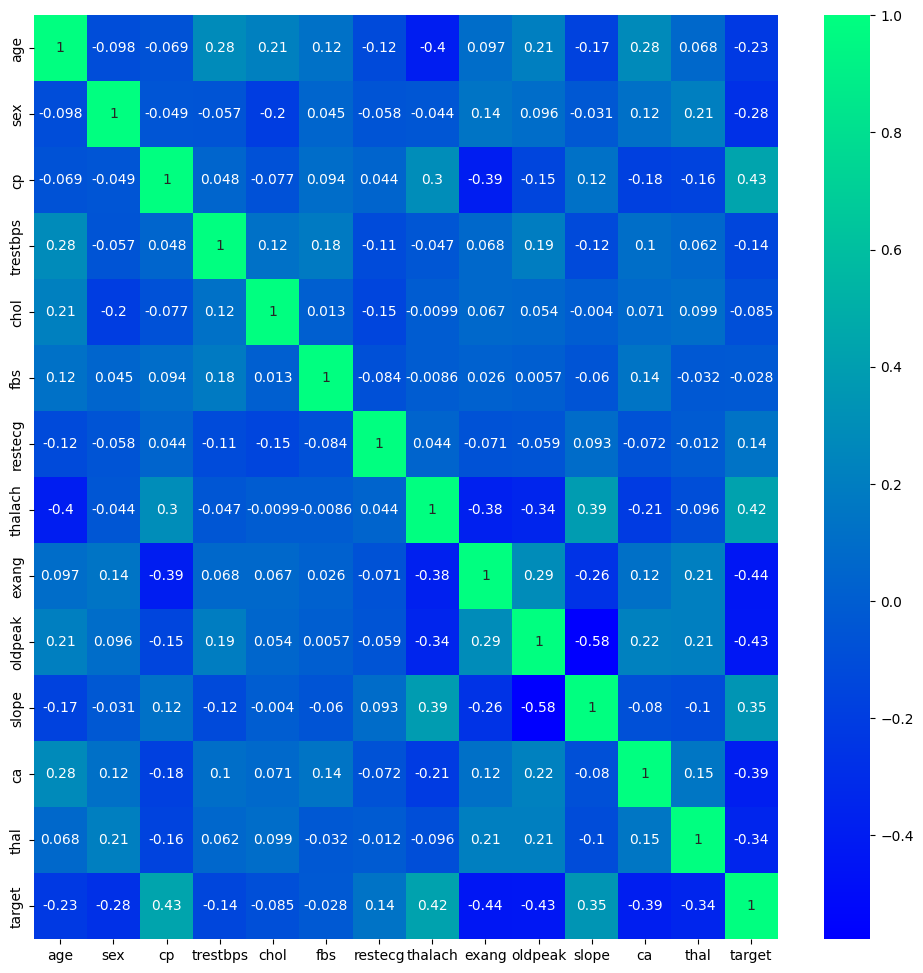

In [11]:
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(12,12))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="winter")

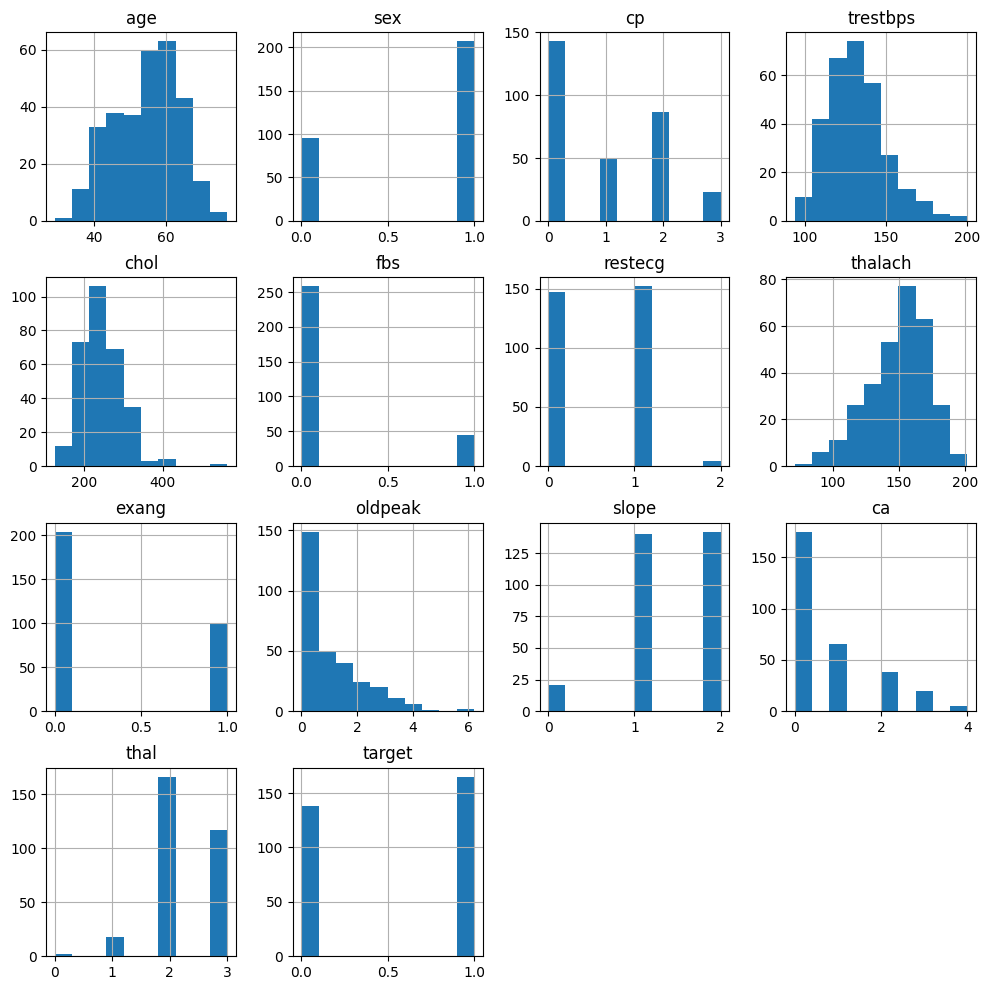

In [12]:
# plot histograms for each variable
data.hist(figsize = (12, 12))
plt.show()

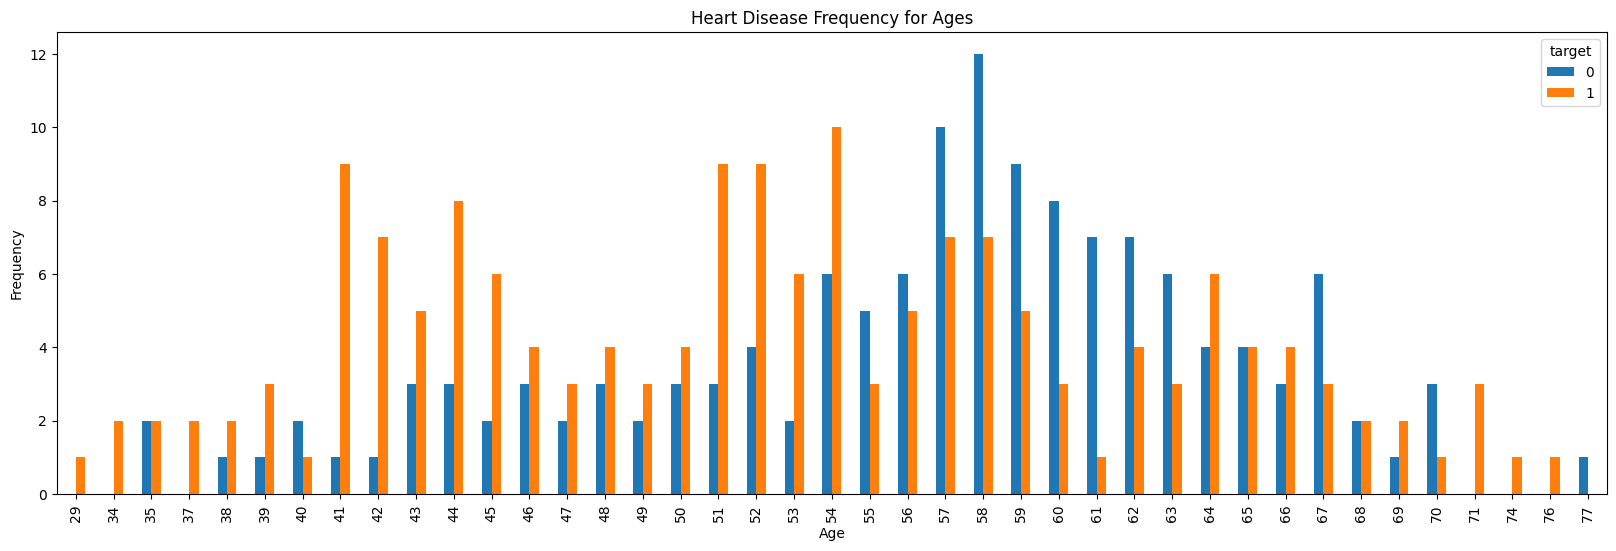

In [13]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [14]:
# checking the distribution of Target Variable
data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [15]:
y = data["target"]
X = data.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 2)

Before applying algorithm we should check whether the data is equally splitted or not, because if data is not splitted equally it will cause for data imbalacing problem

In [16]:
print(y_test.unique())
Counter(y_train)

[1 0]


Counter({0: 106, 1: 136})



Accuracy of Random Forest: 83.60655737704919 

Testing Accuracy for Random Forest: 0.8360655737704918
Testing Sensitivity for Random Forest: 0.9230769230769231
Testing Specificity for Random Forest: 0.7714285714285715
Testing Precision for Random Forest: 0.75


              precision    recall  f1-score   support

           0       0.92      0.75      0.83        32
           1       0.77      0.93      0.84        29

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.84        61
weighted avg       0.85      0.84      0.84        61



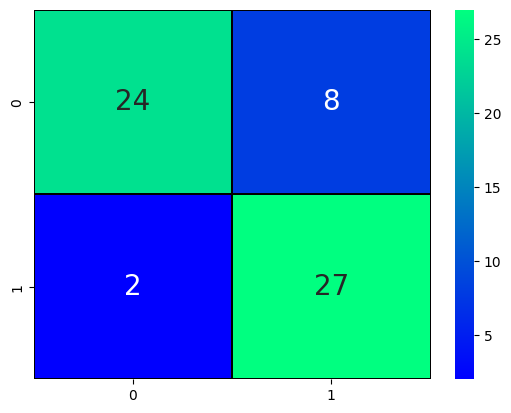

In [17]:
m1 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
cm=confusion_matrix(y_test,rf_predicted)
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('\n')
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print('Testing Accuracy for Random Forest:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Random Forest:',(TP/(TP+FN)))
print('Testing Specificity for Random Forest:',(TN/(TN+FP)))
print('Testing Precision for Random Forest:',(TP/(TP+FP)))
print('\n')
print(classification_report(y_test,rf_predicted))



Accuracy of DecisionTreeClassifier: 78.68852459016394 

Testing Accuracy for Decision Tree: 0.7868852459016393
Testing Sensitivity for Decision Tree: 0.9130434782608695
Testing Specificity for Decision Tree: 0.7105263157894737
Testing Precision for Decision Tree: 0.65625


              precision    recall  f1-score   support

           0       0.91      0.66      0.76        32
           1       0.71      0.93      0.81        29

    accuracy                           0.79        61
   macro avg       0.81      0.79      0.78        61
weighted avg       0.82      0.79      0.78        61



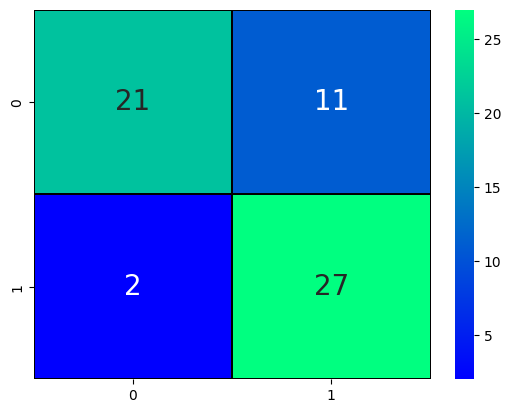

In [18]:
m2 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
cm= confusion_matrix(y_test,dt_predicted)
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('\n')
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print('Testing Accuracy for Decision Tree:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Decision Tree:',(TP/(TP+FN)))
print('Testing Specificity for Decision Tree:',(TN/(TN+FP)))
print('Testing Precision for Decision Tree:',(TP/(TP+FP)))
print('\n')
print(classification_report(y_test, dt_predicted))



Accuracy of Support Vector Classifier: 72.1311475409836 

Testing Accuracy for SVM: 0.7213114754098361
Testing Sensitivity for Support Vector Classifier: 0.8947368421052632
Testing Specificity for Support Vector Classifier: 0.6428571428571429
Testing Precision for Support Vector Classifier: 0.53125


              precision    recall  f1-score   support

           0       0.89      0.53      0.67        32
           1       0.64      0.93      0.76        29

    accuracy                           0.72        61
   macro avg       0.77      0.73      0.71        61
weighted avg       0.77      0.72      0.71        61



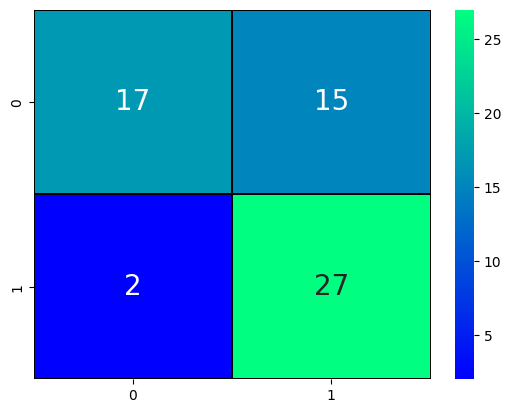

In [19]:
m3 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
cm= confusion_matrix(y_test,svc_predicted)
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('\n')
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print('Testing Accuracy for SVM:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Support Vector Classifier:',(TP/(TP+FN)))
print('Testing Specificity for Support Vector Classifier:',(TN/(TN+FP)))
print('Testing Precision for Support Vector Classifier:',(TP/(TP+FP)))
print('\n')
print(classification_report(y_test,svc_predicted))



Accuracy of Logistic Regression: 90.1639344262295 

Testing Accuracy for Logistic Regression: 0.9016393442622951
Testing Sensitivity for Logistic Regression: 1.0
Testing Specificity for Logistic Regression: 0.8285714285714286
Testing Precision for Logistic Regression: 0.8125


              precision    recall  f1-score   support

           0       1.00      0.81      0.90        32
           1       0.83      1.00      0.91        29

    accuracy                           0.90        61
   macro avg       0.91      0.91      0.90        61
weighted avg       0.92      0.90      0.90        61



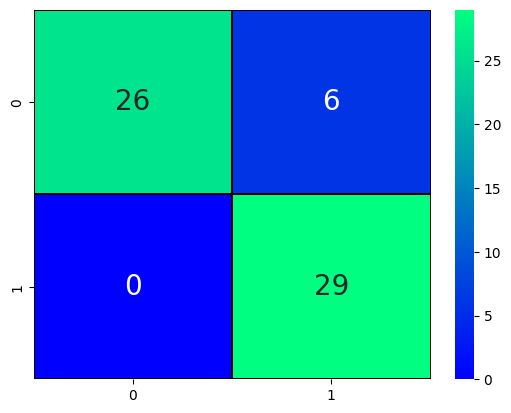

In [20]:
m4 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
cm= confusion_matrix(y_test,lr_predict)
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('\n')
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print('Testing Accuracy for Logistic Regression:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Logistic Regression:',(TP/(TP+FN)))
print('Testing Specificity for Logistic Regression:',(TN/(TN+FP)))
print('Testing Precision for Logistic Regression:',(TP/(TP+FP)))
print('\n')
print(classification_report(y_test, lr_predict))

In [21]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Random Forest',
                    'Decision Tree','Support Vector Classifier'], 'Accuracy': [lr_acc_score*100,
                   rf_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,90.163934
1,Random Forest,83.606557
2,Decision Tree,78.688525
3,Support Vector Classifier,72.131148


<Axes: >

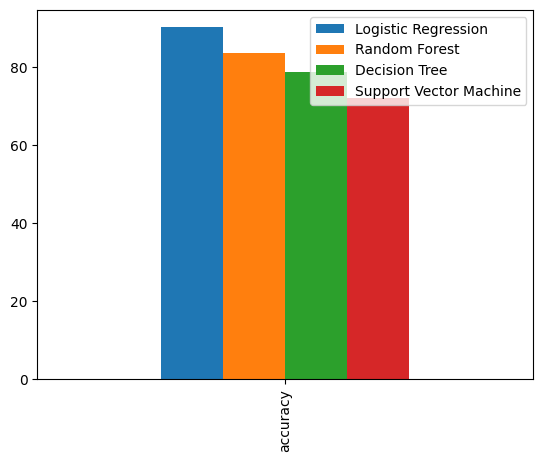

In [22]:
scores = [lr_acc_score*100,rf_acc_score*100,dt_acc_score*100,svc_acc_score*100]
algorithms = ["Logistic Regression","Random Forest","Decision Tree","Support Vector Machine"]

model_compare = pd.DataFrame(scores, index=algorithms, columns=['accuracy']).T
model_compare.plot.bar()


Ensembling

In order to increase the accuracy of the model we use ensembling. Here we use stacking technique.





Accuracy of StackingCVClassifier: 88.52459016393442 



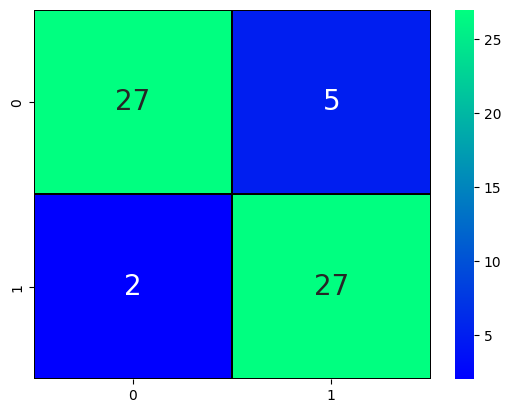

In [23]:
scv=StackingCVClassifier(classifiers=[rf,lr,dt],meta_classifier= svc,random_state=42)
scv.fit(X_train,y_train)
scv_predicted = scv.predict(X_test)
scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
scv_acc_score = accuracy_score(y_test, scv_predicted)
cm= confusion_matrix(y_test,scv_predicted)
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('\n')
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')

Building a Predictive System

In [24]:
input_data = (58,0,3,150,283,1,0,162,0,1,2,0,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The patient seems to be Normal:)')
else:
  print('The patient seems to be have heart disease:(')

[1]
The patient seems to be have heart disease:(
